## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


### Load the dataset

In [22]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [23]:
cat = []
num = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

print('The Categorical columns are:\n', cat, '\n')
print('The Numerical columns are:\n', num)

The Categorical columns are:
 ['sex', 'smoker', 'day', 'time'] 

The Numerical columns are:
 ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [24]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [25]:
df.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [26]:
df.groupby('time')['size'].count()

time
Dinner    176
Lunch      68
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [27]:
df['tip'].describe()

# Comment on the variable 'tip'
# max of tip is much higher than mean of tip, this shows possiblity of outliers in column

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [28]:
df.day.mode()

0    Sat
Name: day, dtype: object

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

C:\Users\avadh\AppData\Local\Temp\ipykernel_20268\333729535.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_bill'])


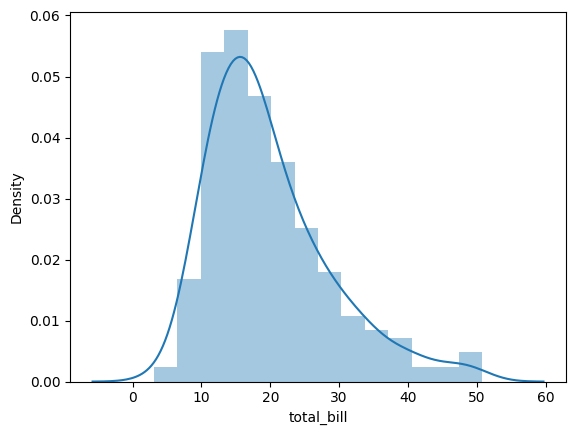

In [29]:
sns.distplot(df['total_bill'])
plt.show()

In [30]:
df['total_bill'].skew()

np.float64(1.1332130376158205)

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

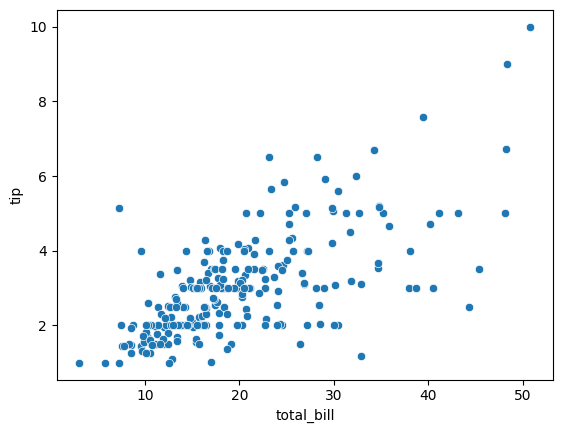

In [31]:
sns.scatterplot(x = df['total_bill'], y = df['tip'], data= df)
plt.show()

### 9. What is the percentage of males and females in the dataset? and display it in the plot

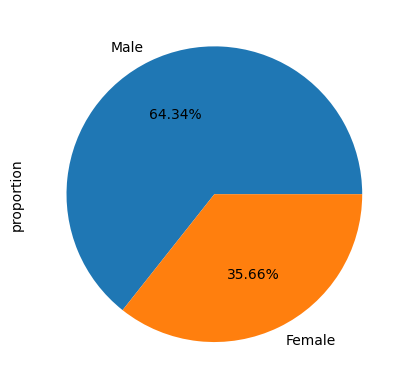

In [32]:
df['sex'].value_counts(normalize = True).plot(kind='pie', autopct = '%.2f%%')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [33]:
df.groupby('sex')['smoker'].value_counts()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
Name: count, dtype: int64

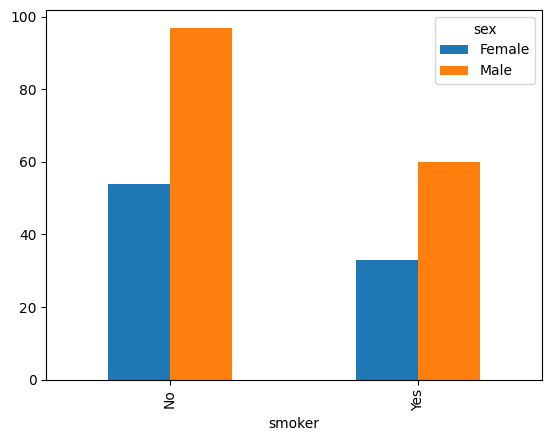

In [34]:
pd.crosstab(df['smoker'],df['sex']).plot(kind='bar')
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

In [35]:
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

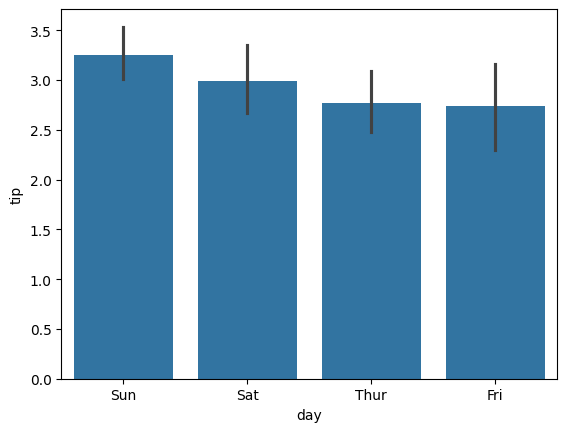

In [36]:
sns.barplot(x='day', y= 'tip', data= df)
plt.show()

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

<Axes: xlabel='size'>

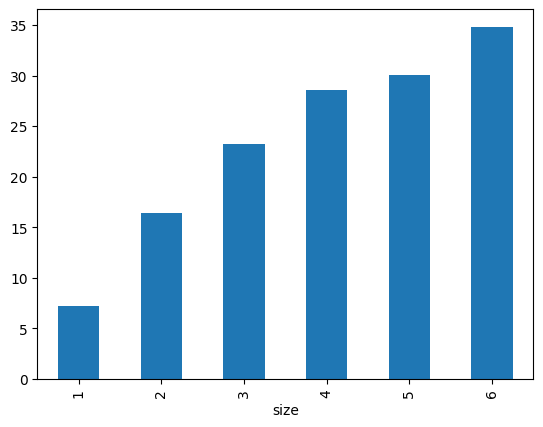

In [37]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

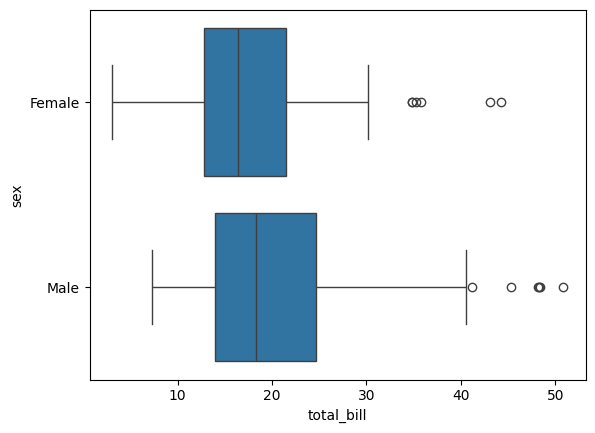

In [38]:
sns.boxplot(x = 'total_bill', y = 'sex', data= df)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [39]:
df.groupby(['time','day'])['total_bill'].max()[df.time='Dinner' and df.day in ['Sat','Sun']]

SyntaxError: cannot assign to attribute here. Maybe you meant '==' instead of '='? (374563668.py, line 1)

### 15. Compute the percentage of missing values in the dataset.

In [ ]:
df.isnull().sum()/len(df)*100

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [ ]:
len(df[df.duplicated()])

In [70]:
df.drop_duplicates(inplace = True) # drop

In [ ]:
len(df[df.duplicated()])

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

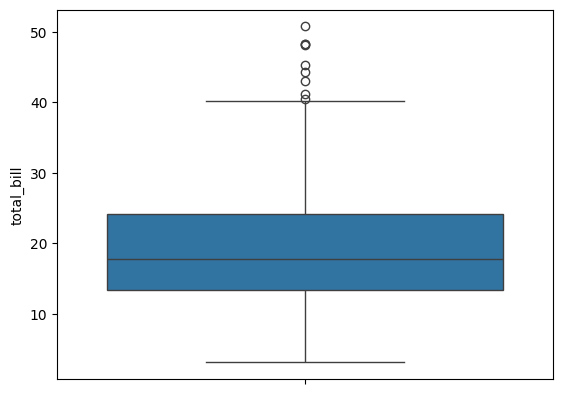

In [40]:
sns.boxplot(df['total_bill'],)
plt.show()

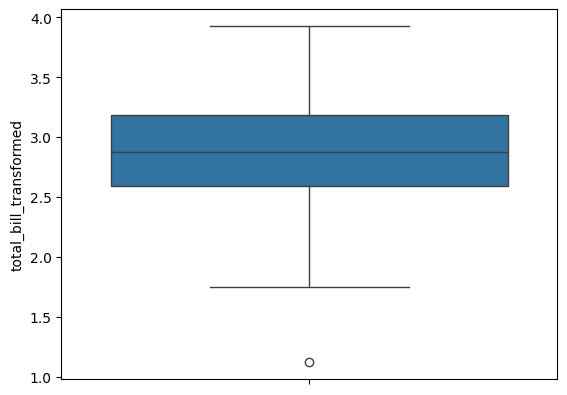

In [41]:
# Treating outliers by using Log Transformation
df['total_bill_transformed'] = np.log(df['total_bill'])

# Boxplot After the tranformation method
sns.boxplot(df['total_bill_transformed'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

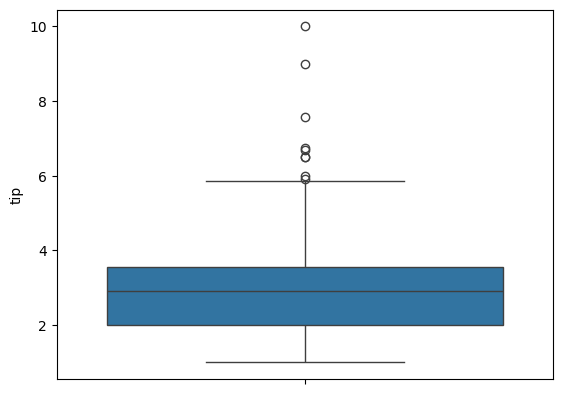

In [42]:
sns.boxplot(df['tip'])
plt.show()

In [44]:
# Using IQR method
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

lower_Whisker = Q1 - (1.5 * IQR)
upper_Whisker = Q3 + (1.5 * IQR)

df_out = df.loc[(df['tip'] < upper_Whisker) & (df['tip'] > lower_Whisker)]


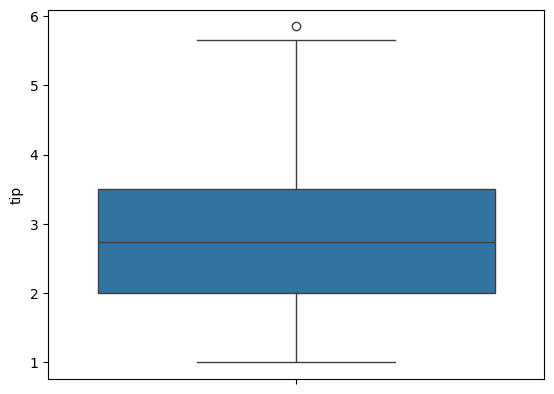

In [45]:
sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [46]:
# Encoding categorical columns
df_enc = pd.get_dummies(df,drop_first = True)
df_enc.head()

,total_bill,tip,size,total_bill_transformed,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,2.832625,False,False,False,True,False,False
1,10.34,1.66,3,2.336020,True,False,False,True,False,False
2,21.01,3.50,3,3.044999,True,False,False,True,False,False
3,23.68,3.31,2,3.164631,True,False,False,True,False,False
4,24.59,3.61,4,3.202340,False,False,False,True,False,False


In [47]:
# Print the random 5 samples from the dataframe
df_enc.sample(5)

,total_bill,tip,size,total_bill_transformed,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
58,11.24,1.76,2,2.419479,True,True,True,False,False,False
100,11.35,2.50,2,2.429218,False,True,False,False,False,False
88,24.71,5.85,2,3.207208,True,False,False,False,True,True
17,16.29,3.71,3,2.790551,True,False,False,True,False,False
6,8.77,2.00,2,2.171337,True,False,False,True,False,False


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [48]:
# Range of the column 'total_bill' 
bill_Max = df['total_bill'].max()
bill_Min = df['total_bill'].min()
bill_Range = bill_Max - bill_Min

bill_Range

np.float64(47.74)

In [49]:
# Transform the values such that the range will be 1
# Import MinMaxScaler() from sklearn library

# Initialize the MinMaxScaler
mm = MinMaxScaler()

# Fit and transform the 'total_bill' column
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

# Checking the range after Transformation
bill_Max_mm = df['total_bill_mm'].max()
bill_Min_mm = df['total_bill_mm'].min()
bill_Range_mm = bill_Max_mm - bill_Min

bill_Max_mm

np.float64(0.9999999999999999)

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [50]:
# Loading dataset as "tips_df"
tip_df = pd.read_csv('tips.csv')
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [51]:
# Encoding the categorical variables
tip_df = pd.get_dummies(tip_df, drop_first = True)
tip_df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [52]:
# Store the target column tip in the y variable and the rest of the columns in the X variable.
x = tip_df.drop('tip', axis = 1)
y = tip_df['tip']
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [53]:
# Import train_test_split and MinMaxScaler methods from sklearn

# Spilting the dataset
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.30)
print(x_Train.shape, x_Test.shape)
print(y_Train.shape, y_Test.shape)

(170, 8) (74, 8)
(170,) (74,)


In [54]:
# Scaling the dataset using MinMaxScaler
mm = MinMaxScaler()

x_Train.iloc[:,:2] = mm.fit_transform(x_Train.iloc[:,:2])
x_Test.iloc[:,:2] = mm.transform(x_Test.iloc[:,:2])


C:\Users\avadh\AppData\Local\Temp\ipykernel_20268\1699193493.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.  0.2 0.4 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.6 0.2 0.  0.2 0.2 0.2 0.4 0.2
 0.2 0.4 0.6 0.6 0.4 0.2 0.4 0.4 0.4 0.4 0.6 0.2 0.2 0.2 0.4 0.2 0.2 0.2
 0.2 0.2 0.2 0.6 0.2 0.6 0.2 0.2 0.2 0.2 0.6 1.  0.2 0.2 0.6 0.6 0.2 0.4
 0.2 0.2 0.4 0.2 0.2 0.2 0.8 0.2 0.2 0.2 0.2 0.2 0.2 0.4 0.2 0.4 0.2 0.2
 0.2 0.4 0.2 0.2 0.6 0.2 0.2 0.2 0.4 0.8 0.2 0.4 0.2 0.4 0.6 0.2 0.2 0.2
 0.2 0.4 0.6 0.2 0.2 1.  0.2 0.6 0.2 0.4 0.2 0.6 0.2 0.6 0.2 0.6 0.4 0.2
 0.2 0.2 0.4 0.2 0.2 0.8 0.2 0.2 0.2 0.6 0.2 0.2 1.  0.6 0.6 0.6 0.6 0.4
 0.2 0.2 0.6 0.2 0.2 0.2 0.2 0.8 0.2 0.2 0.2 0.2 0.2 0.2 0.6 0.2 0.2 0.6
 0.2 0.2 0.2 0.2 0.2 0.6 0.  0.2 0.2 0.2 0.2 0.6 0.2 0.6 0.6 0.6 0.2 0.2
 0.4 0.4 0.4 0.2 0.2 0.6 0.2 0.2]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x_Train.iloc[:,:2] = mm.fit_transf

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [55]:
# Train a linear regression model using the training data and print the r_squared value of the prediction 
# Import LinearRegression and r2_sccore

# Fitting linear regression model
lr = LinearRegression()
lr.fit(x_Train, y_Train)

LinearRegression()

In [56]:
# Prediction for next data point
Pred = lr.predict(x_Test)
Pred

array([2.32833474, 2.34318897, 2.72822536, 2.12550017, 2.2372703 ,
       1.96063533, 2.92788498, 1.34660419, 3.60040418, 2.95320716,
       3.88300129, 2.01279579, 4.31747958, 2.56628811, 4.36079332,
       2.17663065, 3.39539822, 2.22389722, 2.20930888, 2.77300396,
       3.05770281, 2.15917413, 1.19937659, 5.41495964, 3.18753809,
       2.35359814, 2.13393159, 2.1818055 , 2.31030789, 2.65831114,
       2.73243227, 3.07668825, 5.41683607, 2.27717129, 4.77553029,
       2.69070808, 2.251757  , 2.77340318, 2.18843175, 1.95122929,
       1.99691287, 4.00383495, 2.70199241, 5.91340247, 2.43253645,
       5.83456022, 3.84779781, 2.92546958, 3.19381868, 3.97478179,
       3.46539507, 3.39408823, 4.69311648, 2.62974339, 3.249618  ,
       2.46176689, 3.6935398 , 2.97006162, 1.99355368, 2.82205517,
       2.45410743, 2.61225552, 2.58599908, 4.94249768, 1.84636489,
       2.16580039, 2.11905489, 2.85968644, 1.81631438, 2.16858783,
       1.82603124, 2.79482487, 3.33301514, 2.775388  ])

In [57]:
# Compute r2_score
print('r2_score test:', r2_score(y_Test, Pred))

r2_score test: -0.09702844784502052


### Happy Learning:)